In [87]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

os.environ['KMP_DUPLICATE_LIB_OK']='True'
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

In [88]:
training_df = pd.read_csv(filepath_or_buffer="https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
training_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [89]:
training_df.median_house_value = training_df.median_house_value / 1000.0
training_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66.9
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80.1
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85.7
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73.4
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65.5


In [90]:
# The maximum value (max) of several columns seems very
# high compared to the other quantiles. For example,
# example the total_rooms column. Given the quantile
# values (25%, 50%, and 75%), you might expect the
# max value of total_rooms to be approximately
# 5,000 or possibly 10,000. However, the max value
# is actually 37,937.

# When you see anomalies in a column, become more careful
# about using that column as a feature. That said,
# anomalies in potential features sometimes mirror
# anomalies in the label, which could make the column
# be (or seem to be) a powerful feature.
# Also, as you will see later in the course, you
# might be able to represent (pre-process) raw data
# in order to make columns into useful features.

training_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207.300912
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115.983764
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14.999000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119.400000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180.400000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500.001000


In [91]:
training_df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925208,-0.114250,0.047010,0.071802,0.101674,0.059628,-0.015485,-0.044982
latitude,-0.925208,1.000000,0.016454,-0.038773,-0.069373,-0.111261,-0.074902,-0.080303,-0.144917
housing_median_age,-0.114250,0.016454,1.000000,-0.360984,-0.320434,-0.295890,-0.302754,-0.115932,0.106758
total_rooms,0.047010,-0.038773,-0.360984,1.000000,0.928403,0.860170,0.919018,0.195383,0.130991
total_bedrooms,0.071802,-0.069373,-0.320434,0.928403,1.000000,0.881169,0.980920,-0.013495,0.045783
population,0.101674,-0.111261,-0.295890,0.860170,0.881169,1.000000,0.909247,-0.000638,-0.027850
households,0.059628,-0.074902,-0.302754,0.919018,0.980920,0.909247,1.000000,0.007644,0.061031
median_income,-0.015485,-0.080303,-0.115932,0.195383,-0.013495,-0.000638,0.007644,1.000000,0.691871
median_house_value,-0.044982,-0.144917,0.106758,0.130991,0.045783,-0.027850,0.061031,0.691871,1.000000


In [92]:
def build_model(_learning_rate):
    _model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(units=1, input_shape=(1,))
    ])
    _model.compile(
        optimizer=tf.keras.optimizers.RMSprop(learning_rate=_learning_rate),
        loss="mean_squared_error",
        metrics=[tf.keras.metrics.RootMeanSquaredError()]
    )
    return _model

In [93]:
def train_model(_model, _df, _feature, _label, _epochs, _batch_size):
    _history = _model.fit(
        x= _df[_feature],
        y= _df[_label],
        epochs=_epochs,
        batch_size=_batch_size
    )

    _trained_weight = _model.get_weights()[0]
    _trained_bias = _model.get_weights()[1]

    _epochs = _history.epoch
    _hist = pd.DataFrame(_history.history)
    _rmse = _hist["root_mean_squared_error"]
    return _trained_weight, _trained_bias, _epochs, _rmse

In [94]:
def plot_model(_trained_weight, _trained_bias, _feature, _label):
    plt.xlabel(_feature)
    plt.ylabel(_label)

    _random_examples = training_df.sample(n=200)
    plt.scatter(_random_examples[_feature], _random_examples[_label])

    x0 = 0
    y0 = _trained_bias
    x1 = 10000
    y1 = _trained_bias + _trained_weight * x1
    plt.plot([x0, x1], [y0, y1])

    plt.show()

In [95]:
def plot_loss(_epochs, _rmse):
    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Root Mean Squared Error")
    plt.plot(_epochs, _rmse, label="Loss")

    plt.legend()
    plt.ylim([_rmse.min()*0.97, _rmse.max()])
    plt.show()

In [96]:
learning_rate = 0.06
epochs = 24
batch_size = 30

feature = "median_income"
label = "median_house_value"

model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(model, training_df, feature, label, epochs, batch_size)

print("Trained weight: %s" % trained_weight)
print("Trained bias: %s" % trained_bias)

Epoch 1/24
567/567 [==============================] - 0s 119us/step - loss: 28012.6816 - root_mean_squared_error: 167.3699
Epoch 2/24
567/567 [==============================] - 0s 23us/step - loss: 7328.1724 - root_mean_squared_error: 85.6047
Epoch 3/24
567/567 [==============================] - 0s 344us/step - loss: 7016.1055 - root_mean_squared_error: 83.7622
Epoch 4/24
567/567 [==============================] - 0s 3us/step - loss: 7015.6401 - root_mean_squared_error: 83.7594
Epoch 5/24
567/567 [==============================] - 0s 40us/step - loss: 7015.1338 - root_mean_squared_error: 83.7564
Epoch 6/24
567/567 [==============================] - 0s 146us/step - loss: 7016.9868 - root_mean_squared_error: 83.7675
Epoch 7/24
567/567 [==============================] - 0s 231us/step - loss: 7014.1738 - root_mean_squared_error: 83.7507
Epoch 8/24
567/567 [==============================] - 0s 29us/step - loss: 7017.4219 - root_mean_squared_error: 83.7701
Epoch 9/24
567/567 [===============

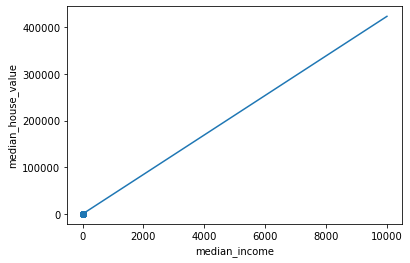

In [97]:
plot_model(trained_weight, trained_bias, feature, label)

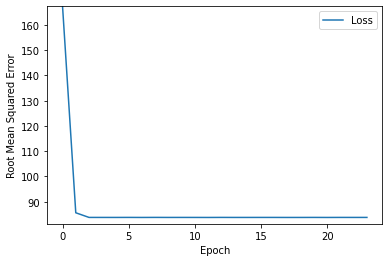

In [98]:
plot_loss(epochs, rmse)

In [99]:
def predict_house_values(_n, _feature, _label):
    _batch = training_df[_feature][10000:10000+_n]
    _predictions = model.predict(_batch)
    print("feature   label          predicted")
    print("  value   value          value")
    print("          in thousand$   in thousand$")
    print("--------------------------------------")
    for i in range(_n):
        print ("%5.0f %6.0f %15.0f" % (training_df[_feature][10000 + i],
                                       training_df[_label][10000 + i],
                                       _predictions[i][0] ))

In [100]:
predict_house_values(10, feature, label)

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
    2     53             135
    4     92             212
    3     69             154
    2     62             132
    3     80             154
    2    295             148
   10    500             458
    5    342             261
    2    118             147
    4    128             222
